In [12]:
library(tidyverse)
options(repr.plot.width=5, repr.plot.height=5)

# Distribuição *t* de Student: Biometrika. 1908, vol. 6, 1-15

<img src="img/William_Sealy_Gosset.jpg" alt="drawing" width="200"/>

### Teste $t$ de *Student* para uma média

In [2]:
set.seed(839)
mu = 2.65
sigma = 0.5
n = 10
amostra = rnorm(n = n, mean = mu, sd = sigma) %>% round(2)
amostra

[1] 2.92 2.69 2.99 3.60 2.83 2.64 2.53 2.99 2.67 2.55

In [3]:
(xb = mean(amostra))
(dp = sd(amostra))
(ep = dp / sqrt(n))

[1] 2.841

[1] 0.316349

[1] 0.1000383

In [4]:
(tc = (xb - mu) / ep)

[1] 1.909268

In [5]:
(valor_p = pt(q = tc, df = n - 1, lower.tail = FALSE) * 2)

[1] 0.08856526

In [6]:
t.test(amostra, mu = mu, alternative = "two.sided")


	One Sample t-test

data:  amostra
t = 1.9093, df = 9, p-value = 0.08857
alternative hypothesis: true mean is not equal to 2.65
95 percent confidence interval:
 2.614698 3.067302
sample estimates:
mean of x 
    2.841 


### Teste $t$ de *Student* para duas amostras: Chacais dourados

<img src="img/Golden_jackals.jpg" alt="drawing" width="400"/>

In [7]:
jackal <- read.csv('datasets/jackal.csv', sep = ';', header = TRUE)
(jackal)

Comprimento,Sexo
120,Macho
107,Macho
110,Macho
116,Macho
114,Macho
111,Macho
113,Macho
117,Macho
114,Macho
112,Macho


In [8]:
jackal %>% group_by(Sexo) %>% 
    summarize(Medias = mean(Comprimento))

Sexo,Medias
Femea,108.6
Macho,113.4


In [9]:
jackal %>% group_by(Sexo) %>% 
    summarize(Desvio = sd(Comprimento))

Sexo,Desvio
Femea,2.270585
Macho,3.717825


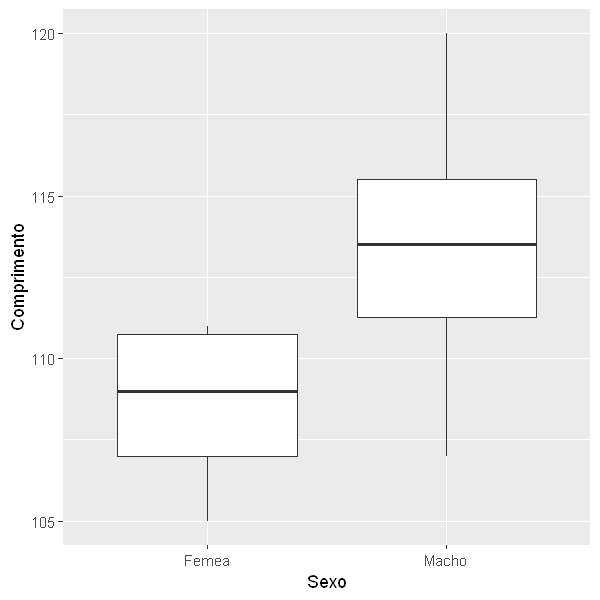

In [10]:
ggplot(jackal, aes(x = Sexo, y = Comprimento)) +
    geom_boxplot()

In [11]:
t.test(Comprimento ~ Sexo, data = jackal, alternative = 'two.sided', var.equal = TRUE)



	Two Sample t-test

data:  Comprimento by Sexo
t = -3.4843, df = 18, p-value = 0.002647
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.694227 -1.905773
sample estimates:
mean in group Femea mean in group Macho 
              108.6               113.4 
